# Preliminary Data Report

## Data Exploration

An example of the data is shown below.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv', low_memory=False)

df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


#### Attribute types

In [2]:
print("Data types contained in the data")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df.dtypes)

Data types contained in the data
Music                             float64
Slow songs or fast songs          float64
Dance                             float64
Folk                              float64
Country                           float64
Classical music                   float64
Musical                           float64
Pop                               float64
Rock                              float64
Metal or Hardrock                 float64
Punk                              float64
Hiphop, Rap                       float64
Reggae, Ska                       float64
Swing, Jazz                       float64
Rock n roll                       float64
Alternative                       float64
Latino                            float64
Techno, Trance                    float64
Opera                             float64
Movies                            float64
Horror                            float64
Thriller                          float64
Comedy                            float64
R

#### Data Dimensions

In [3]:
print("Total Number of Attributes: ", df.shape[1])
print("Total Number of Samples: ", df.shape[0])
print("Total Number of Cells: ", df.size)

Total Number of Attributes:  150
Total Number of Samples:  1010
Total Number of Cells:  151500


#### Data Summaries

In [4]:
print("5 number summaries for each numerical category ")
print(df.describe())

5 number summaries for each numerical category 
             Music  Slow songs or fast songs        Dance         Folk  \
count  1007.000000               1008.000000  1006.000000  1005.000000   
mean      4.731877                  3.328373     3.113320     2.288557   
std       0.664049                  0.833931     1.170568     1.138916   
min       1.000000                  1.000000     1.000000     1.000000   
25%       5.000000                  3.000000     2.000000     1.000000   
50%       5.000000                  3.000000     3.000000     2.000000   
75%       5.000000                  4.000000     4.000000     3.000000   
max       5.000000                  5.000000     5.000000     5.000000   

           Country  Classical music      Musical          Pop         Rock  \
count  1005.000000      1003.000000  1008.000000  1007.000000  1004.000000   
mean      2.123383         2.956132     2.761905     3.471698     3.761952   
std       1.076136         1.252570     1.260845   

In [5]:
print("Unique Values for each attrbute:")
for (columnName, columnData) in df.iteritems():
    print(columnName)
    print(pd.unique(df[columnName]))

Unique Values for each attrbute:
Music
[ 5.  4.  1.  3.  2. nan]
Slow songs or fast songs
[ 3.  4.  5.  2.  1. nan]
Dance
[ 2.  4.  5.  3.  1. nan]
Folk
[ 1.  2.  3.  5.  4. nan]
Country
[ 2.  1.  3.  4.  5. nan]
Classical music
[ 2.  1.  4.  3.  5. nan]
Musical
[ 1.  2.  5.  3.  4. nan]
Pop
[ 5.  3.  2.  4.  1. nan]
Rock
[ 5.  2.  3.  4. nan  1.]
Metal or Hardrock
[ 1.  4.  3.  5.  2. nan]
Punk
[ 1.  4.  2.  3.  5. nan]
Hiphop, Rap
[ 1.  2.  5.  4.  3. nan]
Reggae, Ska
[ 1.  3.  4.  2.  5. nan]
Swing, Jazz
[ 1.  3.  2.  4.  5. nan]
Rock n roll
[ 3.  4.  5.  2.  1. nan]
Alternative
[ 1.  4.  5.  2.  3. nan]
Latino
[ 1.  2.  5.  4.  3. nan]
Techno, Trance
[ 1.  2.  5.  3.  4. nan]
Opera
[ 1.  3.  2.  4.  5. nan]
Movies
[ 5.  4.  3.  2. nan  1.]
Horror
[ 4.  2.  3.  5.  1. nan]
Thriller
[ 2.  4.  5.  1.  3. nan]
Comedy
[ 5.  4.  3.  2.  1. nan]
Romantic
[ 4.  3.  2.  5.  1. nan]
Sci-fi
[ 4.  3.  1.  2.  5. nan]
War
[ 1.  2.  3.  5.  4. nan]
Fantasy/Fairy tales
[ 5.  3.  1.  4.  2. nan]
A

## Data Visualisation


Music
Slow songs or fast songs
Dance
Folk
Country
Classical music
Musical
Pop
Rock
Metal or Hardrock
Punk
Hiphop, Rap
Reggae, Ska
Swing, Jazz
Rock n roll
Alternative
Latino
Techno, Trance
Opera
Movies
Horror
Thriller
Comedy
Romantic
Sci-fi
War
Fantasy/Fairy tales
Animated
Documentary
Western
Action
History
Psychology
Politics
Mathematics
Physics
Internet
PC
Economy Management
Biology
Chemistry
Reading
Geography
Foreign languages
Medicine
Law
Cars
Art exhibitions
Religion
Countryside, outdoors
Dancing
Musical instruments
Writing
Passive sport
Active sport
Gardening
Celebrities
Shopping
Science and technology
Theatre
Fun with friends
Adrenaline sports
Pets
Flying
Storm
Darkness
Heights
Spiders
Rats
Ageing
Dangerous dogs
Fear of public speaking
Healthy eating
Daily events
Prioritising workload
Writing notes
Workaholism
Thinking ahead
Final judgement
Reliability
Keeping promises
Loss of interest
Friends versus money
Funniness
Fake
Criminal damage
Decision making
Elections
Self-criticism
Ju

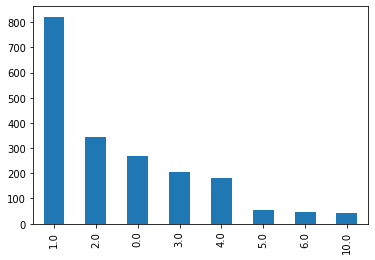

In [16]:
for (columnName, columnData) in df.iteritems():
    if(df[columnName].dtypes == "float64"):
        print(columnName)
        df[columnName].value_counts().plot.bar()
    


## Data Pre-processing 